<a href="https://colab.research.google.com/github/InvisibleNet/Datathon2020-NEU/blob/master/datathon_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/My Drive/datathon


/content/drive/My Drive/datathon


#Step 1

In [2]:
import pandas as pd
def readDataFromSource(source, colname):
  df = pd.read_csv(source)
  df = df[colname]
  return df

In [3]:
def getDataFromColcsv(source,statecolname,startcol,state):
  df =pd.read_csv(source)
  df = df.groupby(statecolname).get_group(state).sum()
  df = df[startcol:]
  df = df.reset_index()
  return df.to_numpy()

In [4]:
import numpy as np
def getStateData(df, state):
  data = np.flip(df.groupby('state').get_group(state).to_numpy(),0)
  return data[:,1:3]
def getStateDataWithoutFlip(df, state):
  data = df.groupby('state').get_group(state).to_numpy()
  return data[:,1:3]

In [5]:
import matplotlib.pyplot as plt
from dateutil import parser
def plotStateTrend(df, state):
  data = getStateData(df, state)
  plt.plot([parser.parse(str(data[i,0])) for i in range(data.shape[0])]
  ,data[:,1])
  plt.title("Cases over time in "+state )

In [6]:
def plotStateTrendWithData(data, state):
  plt.plot([parser.parse(str(data[i,0])) for i in range(data.shape[0])]
  ,data[:,1])
  plt.title("Cases over time in "+state )

In [7]:
def convertTotalToDailyIncrease(data):
  for i in range(data.shape[0]-1,0,-1):
    data[i,1] = data[i,1]-data[i-1,1]
  return data[1:]

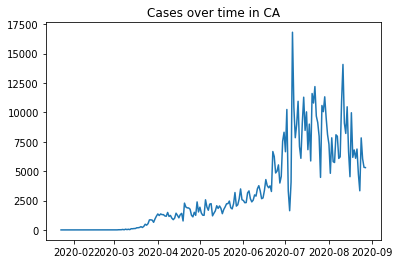

In [8]:
colD = getDataFromColcsv('covid_confirmed_usafacts.csv','State',4,'CA')
plotStateTrendWithData(convertTotalToDailyIncrease(colD),'CA')

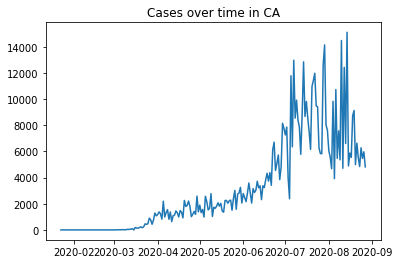

In [9]:
colD2= getDataFromColcsv('time_series_covid19_confirmed_US.csv','Province_State',11,'California')
plotStateTrendWithData(convertTotalToDailyIncrease(colD2),'CA')

In [10]:
nyt = readDataFromSource('all-states-history.csv',['state','date','positive'])

In [11]:
df1 = readDataFromSource('covid-19-state-level-data.csv',['state','date','cases'])


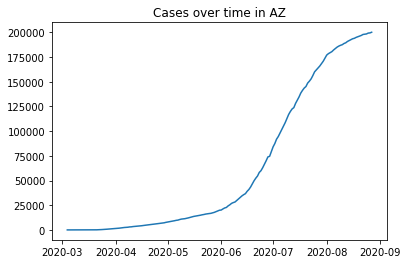

In [12]:
plotStateTrendWithData(getStateData(nyt,'AZ'),'AZ')

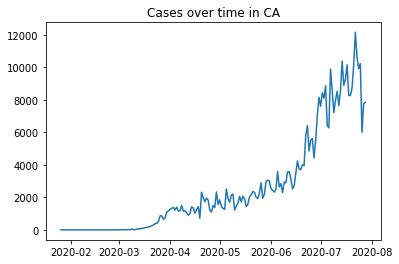

In [13]:
plotStateTrendWithData(convertTotalToDailyIncrease(getStateDataWithoutFlip(df1,'California')),'CA')

In [14]:
!pip install pmdarima

In [15]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
def predictWithArima(data, startIndex, endIndex, nperiod):
  model = pm.auto_arima(data[startIndex:endIndex], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
  return model.predict(n_periods=nperiod)

In [118]:
df1 = readDataFromSource('covid-19-state-level-data.csv',['state','date','cases'])
ca_data = getStateDataWithoutFlip(df1,'New York')
res = predictWithArima(ca_data[:,1],32,90,30)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=976.310, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=975.597, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=976.336, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=974.983, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=971.767, Time=0.15 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=972.139, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=975.268, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=975.620, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=972.169, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=975.534, Time=0.31 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=971.108, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=975.480, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=974.778, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=970.592, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=970.5

Text(0.5, 1.0, 'New York daily total case')

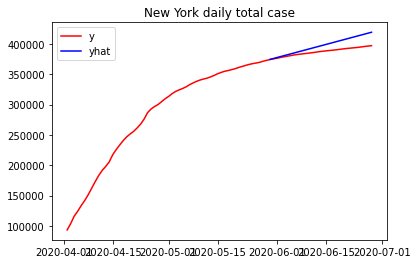

In [134]:
ca_data = getStateDataWithoutFlip(df1,'New York')
org = ca_data[32:120,1];
for i in range(0,ca_data.shape[0]):
  ca_data[i,0] = parser.parse(ca_data[i,0])
plt.plot(ca_data[32:120,0],org,color='r')
plt.plot(ca_data[90:120,0],res,color ='b' );
plt.legend(['y','yhat'])
plt.title("New York daily total case")

In [18]:
computeAvgDiffPercent(res,ca_data[50:80,1])

NameError: ignored

In [19]:
pip install --upgrade mxnet==1.6 gluonts


Requirement already up-to-date: mxnet==1.6 in /usr/local/lib/python3.6/dist-packages (1.6.0)
Requirement already up-to-date: gluonts in /usr/local/lib/python3.6/dist-packages (0.5.2)


In [20]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.trainer import Trainer
import pandas as pd

def predictwithGluonts(dataframe, start, end, n_pred):
  testdata = dataframe[start:end];
  data = common.ListDataset([{
    "start": testdata.set_index('date').index[0],
    "target": testdata.to_numpy()[:,1]
  }], freq="1D")
  trainer = Trainer(epochs=10)
  estimator = deepar.DeepAREstimator(
      freq="1D", prediction_length=n_pred, trainer=trainer)
  predictor = estimator.train(training_data=data)

  prediction = next(predictor.predict(data))
  
  prediction.plot(output_file='graph.png')
  return prediction.mean

In [122]:
import numpy as np
def getStateDataFrame(df, state):
  data = df.sort_values(by='date', ascending=True).groupby('state').get_group(state)
  data['date'] = pd.to_datetime(data['date'],format='%Y%m%d', errors='ignore') 
  return data[['date','cases']]


INFO:gluonts.trainer:Start model training
INFO:gluonts.trainer:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:gluonts.trainer:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:05<00:00,  8.90it/s, epoch=1/10, avg_epoch_loss=12.8]
INFO:gluonts.trainer:Epoch[0] Elapsed time 5.624 seconds
INFO:gluonts.trainer:Epoch[0] Evaluation metric 'epoch_loss'=12.822898
INFO:gluonts.trainer:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.46it/s, epoch=2/10, avg_epoch_loss=11.1]
INFO:gluonts.trainer:Epoch[1] Elapsed time 5.290 seconds
INFO:gluonts.trainer:Epoch[1] Evaluation metric 'epoch_loss'=11.069246
INFO:gluonts.trainer:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.74it/s, epoch=3/10, avg_epoch_loss=10.6]
INFO:gluonts.trainer:Epoch[2] Elapsed time 5.141 seconds
INFO:gluonts.trainer:Epoch[2] Evaluation metric 'epoch_loss'=10.635327
INFO:gluonts.trainer:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.68it/s, epoch=4/10, avg_epoch_loss=10.3]
INFO:gluonts.trainer:Epoch[3] Elapsed time 5.172 seconds
IN

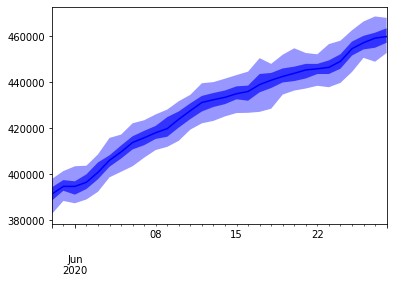

In [141]:
pred = predictwithGluonts(getStateDataFrame(df1,'New York'), 32, 90, 30)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


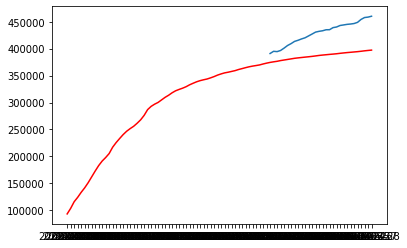

In [143]:
plt.plot(getStateDataFrame(df1,'New York')[32:120].to_numpy()[:,0],getStateDataFrame(df1,'New York')[32:120].to_numpy()[:,1],color ='r' )
plt.plot(getStateDataFrame(df1,'New York')[90:120].to_numpy()[:,0],pred)


In [130]:
getStateDataFrame(df1,'New York')[90:120].to_numpy()

array([['2020-05-30', 374471],
       ['2020-05-31', 375575],
       ['2020-06-01', 376520],
       ['2020-06-02', 377881],
       ['2020-06-03', 378924],
       ['2020-06-04', 379977],
       ['2020-06-05', 381019],
       ['2020-06-06', 382102],
       ['2020-06-07', 382879],
       ['2020-06-08', 383591],
       ['2020-06-09', 384281],
       ['2020-06-10', 384945],
       ['2020-06-11', 385669],
       ['2020-06-12', 386490],
       ['2020-06-13', 387402],
       ['2020-06-14', 388096],
       ['2020-06-15', 388719],
       ['2020-06-16', 389349],
       ['2020-06-17', 389910],
       ['2020-06-18', 390536],
       ['2020-06-19', 391330],
       ['2020-06-20', 392037],
       ['2020-06-21', 392702],
       ['2020-06-22', 393257],
       ['2020-06-23', 393855],
       ['2020-06-24', 394430],
       ['2020-06-25', 395168],
       ['2020-06-26', 395972],
       ['2020-06-27', 396669],
       ['2020-06-28', 397293]], dtype=object)

##Prophet

In [27]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime

In [28]:
def TSPrediction(dataset, state, tStart, tEnd, pSize):
    '''
    dataset: a string represents the directory of .csv file 
    state(string)
    tStart(string): the first day of training 
    tEnd(string): the last day of training
    pSize: int, prediction size
    '''
    if dataset == 'time_series_covid19_confirmed_US.csv':
        df = getDataFromColcsv(dataset, 'Province_State', 10, state)
        table = pd.DataFrame(df[1:])
        
        firstDate = datetime.datetime.strptime(pd.to_datetime(table[0].to_numpy()[0]).strftime('%Y-%m-%d'), '%Y-%m-%d')
        startIndex = ((datetime.datetime.strptime(tStart, '%Y-%m-%d'))-firstDate).days
        endIndex = ((datetime.datetime.strptime(tEnd, '%Y-%m-%d'))-firstDate).days
        
        stateData = pd.DataFrame(table)
        stateData['y'] = stateData[1].diff(1)
        stateData = stateData[[0,"y"]]
        
        training = pd.DataFrame(stateData.iloc[startIndex:endIndex])
        training.rename({0:"ds"}, axis = 1, inplace = True)
        
        original = pd.DataFrame(stateData.iloc[startIndex:pSize+endIndex])
        original.rename({0:"ds"}, axis = 1, inplace = True)
        original.reset_index(drop=True)
    else:    
        table = pd.read_csv(dataset)
        casesByDate = table[['date','state','cases']]
        stateData = pd.DataFrame(casesByDate.loc[casesByDate['state']==state])
        stateData['y'] = stateData['cases'].diff(1)
        stateData = stateData[["date","y"]]

        firstDate = datetime.datetime.strptime(stateData['date'].to_numpy()[0], '%Y-%m-%d')
        startIndex = ((datetime.datetime.strptime(tStart, '%Y-%m-%d'))-firstDate).days
        endIndex = ((datetime.datetime.strptime(tEnd, '%Y-%m-%d'))-firstDate).days

        training = pd.DataFrame(stateData.iloc[startIndex:endIndex])
        training.rename({"date":"ds"}, axis = 1, inplace = True)
        
        original = pd.DataFrame(stateData.iloc[startIndex:pSize+endIndex])
        original.rename({"date":"ds"}, axis = 1, inplace = True)
        original.reset_index(drop=True)
    
    m = Prophet()
    m.fit(training)
    future = m.make_future_dataframe(periods = pSize)
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    fig1 = m.plot(forecast) # plot predictions and origin data
    
    prediction = forecast[['ds','yhat']]
    
    comparison = prediction.set_index('ds').join(original.set_index('ds'))
    comparison = comparison.cumsum()
    
    return comparison

#Step two

In [92]:
##demData: demographic data for all states
##diffPercent: difference percentage between predicted data and real data
##states: all states used for this model
##option: linear-linear regression, lgs-logistic regression, svm-support vector machine
## perceptron, rdf-random forest.
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel
def fitModel(demDataPath,diffPercent):
  df = pd.read_csv(demDataPath)
  df = df.set_index('State')
  y = np.zeros(len(diffPercent))
  for i in range(0,len(diffPercent)):
    y[i] = diffPercent[df.index[i]]
  train_test_data = df.to_numpy()
  print(y)
  x = train_test_data
  enc = LabelEncoder()
  x[:,2] = enc.fit_transform(x[:,2])
  print(x)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
  maxscore = -10;
  for option in ['linear','svm', 'rdf', 'perceptron']:
    if option == 'linear':
      lr = sklearn.linear_model.LinearRegression();
      lr.fit(x_train,y_train)
      print("MSE: "+str(mean_squared_error(y_test, lr.predict(x_test)))+"\n")
      print("R2: "+str(r2_score(y_test, lr.predict(x_test)))+"\n")
      print(lr.score(x_test,y_test))
      print(y_test,lr.predict(x_test))
      score = lr.score(x_test,y_test)
      if (score>maxscore):
        bestModel = lr;
    elif option == "rdf":
      lr = RandomForestRegressor(max_depth=3, random_state=0)
      lr.fit(x_train,y_train)
      print(lr.score(x_test,y_test))
      print("MSE: "+str(mean_squared_error(y_test, lr.predict(x_test)))+"\n")
      print(y_test,lr.predict(x_test))
      score = lr.score(x_test,y_test)
      if (score>maxscore):
        bestModel = lr;
    elif option =='svm':
      lr = svm.SVR()
      lr.fit(x_train,y_train)
      print(lr.score(x_test,y_test))
      print("MSE: "+str(mean_squared_error(y_test, lr.predict(x_test)))+"\n")
      print(y_test,lr.predict(x_test))
      score = lr.score(x_test,y_test)
      if (score>maxscore):
        bestModel = lr;
    
    elif option =='perceptron':
      lr = MLPRegressor(max_iter=500,random_state=0)
      lr.fit(x_train,y_train)
      print(lr.score(x_test,y_test))
      print("MSE: "+str(mean_squared_error(y_test, lr.predict(x_test)))+"\n")
      print(y_test,lr.predict(x_test))
      score = lr.score(x_test,y_test)
      if (score>maxscore):
        bestModel = lr;
    
  resdict = {}
  pred = bestModel.predict(x_test)  
  for i in range(0,y_test.shape[0]):
    for key,value in diffPercent.items():
      if y_test[i] == value:
        resdict[key] = pred[i]
  return {'model':bestModel,'result':resdict};


In [30]:
def converStateName(name):
  states = ['California', 'Washington','Oregon', 'Florida', 'Massachusetts', 'Texas', 'Illinois', 'Minnesota','Colorado', 'New York','Arizona','Nebraska']
  states_abbv = ['CA', 'WA', 'OR','FL','MA','TX','IL','MN','CO','NY','AZ','NE']
  convert = {}
  for i in range(0,len(states)):
    convert[states[i]] = states_abbv[i]
  print(convert)
  return convert[name]

In [101]:
def computeY(df, states, start, end, n_period, model):
  res = {}
  for state in states:
    data = getStateData(df,converStateName(state))
    if model == "arima":
      pred = predictWithArima(data[:,1],start,end,n_period)
      res[state] = computeAvgDiffPercent(pred,data[end:end+n_period,1])
    elif model == "gluonts":
      pred = predictwithGluonts(getStateDataFrame(df,state),start,end,n_period)
      res[state] = computeAvgDiffPercent(pred,data[end:end+n_period,1])
    elif model == 'prophet':
      pred = TSPrediction('covid-19-state-level-data.csv',state,'2020-3-20', '2020-5-10', n_period)[51:].to_numpy()
      res[state] = computeAvgDiffPercent(pred[:,0],pred[:,1])
  return res
def computeAvgDiffPercent(pred, y):
  #yhat_incre = np.array([pred[i] -pred[i-1] for i in range(pred.shape[0]-1,0,-1)])
  #y_incre = np.array([y[i]-y[i-1] for i in range(y.shape[0]-1,0,-1)])
  return np.mean(pred-y)/np.mean(y)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'California': 'CA', 'Washington': 'WA', 'Oregon': 'OR', 'Florida': 'FL', 'Massachusetts': 'MA', 'Texas': 'TX', 'Illinois': 'IL', 'Minnesota': 'MN', 'Colorado': 'CO', 'New York': 'NY', 'Arizona': 'AZ', 'Nebraska': 'NE'}


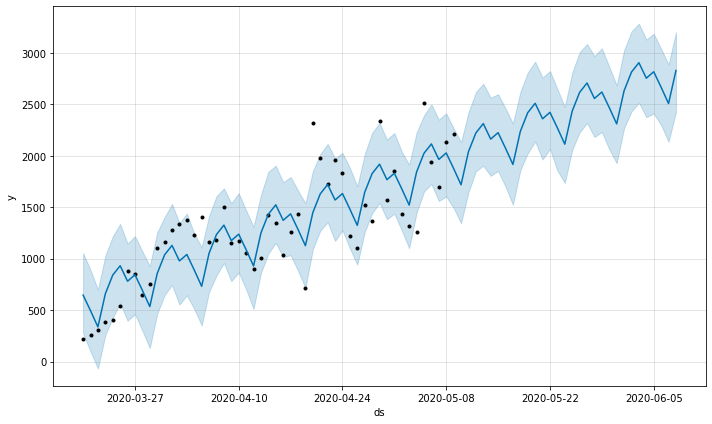

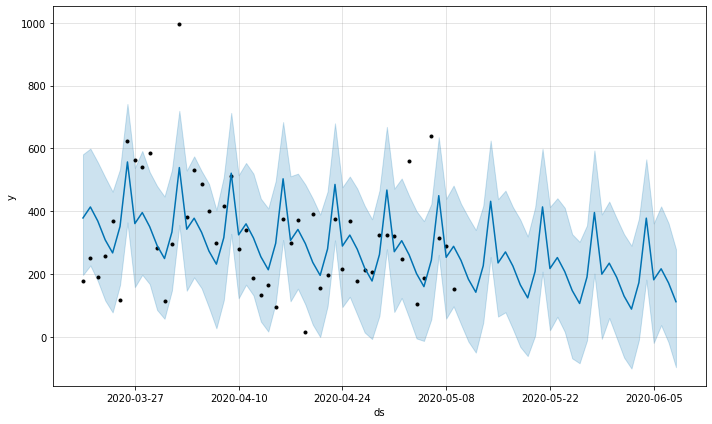

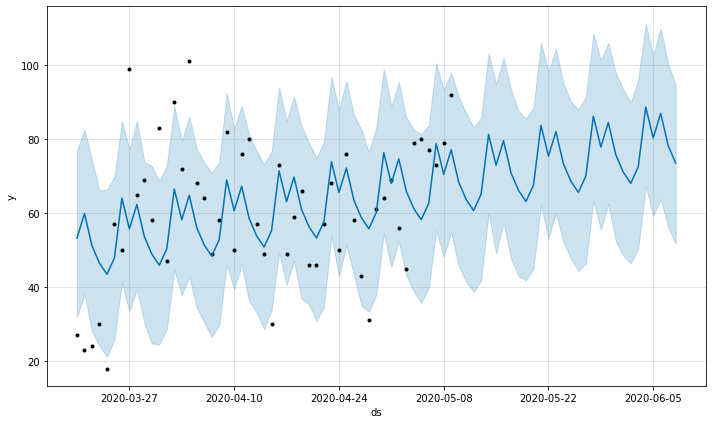

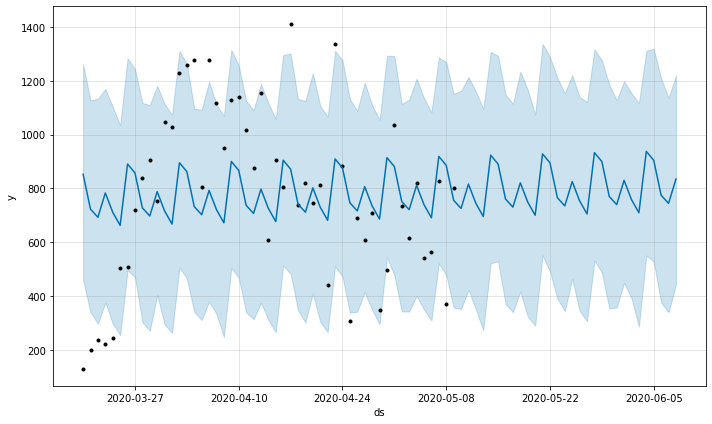

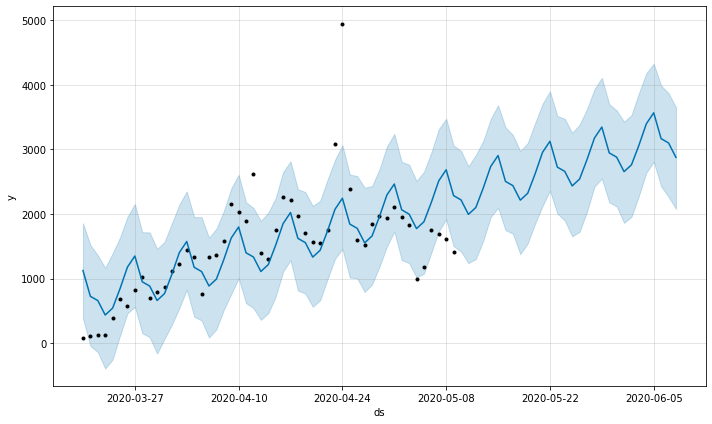

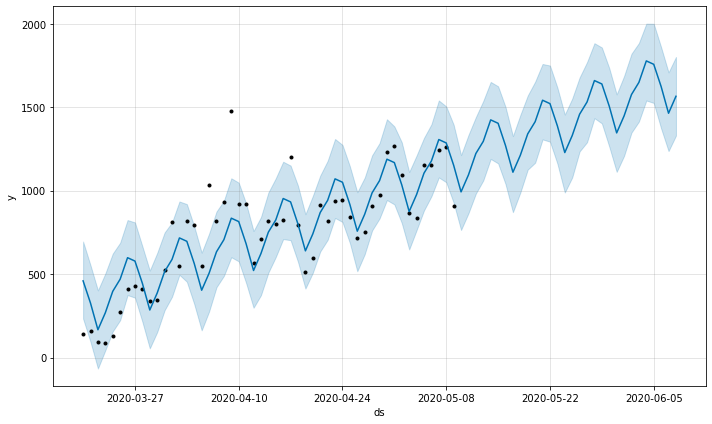

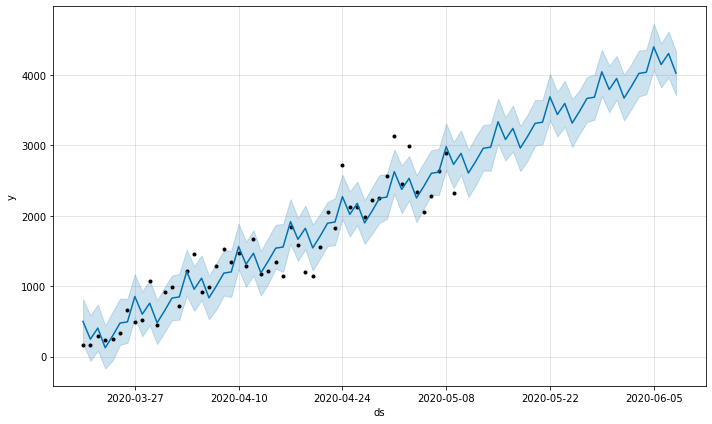

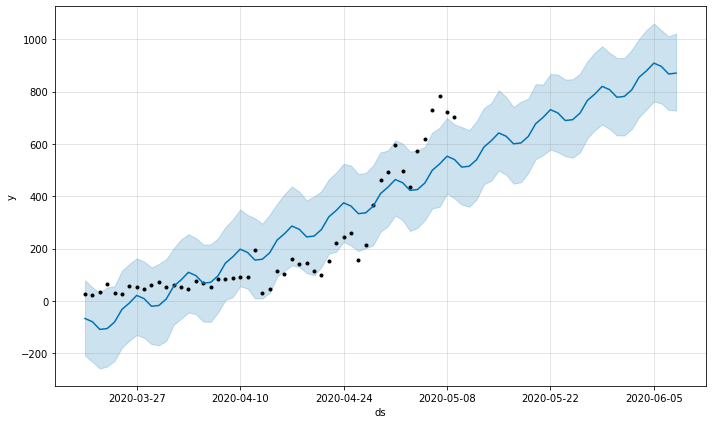

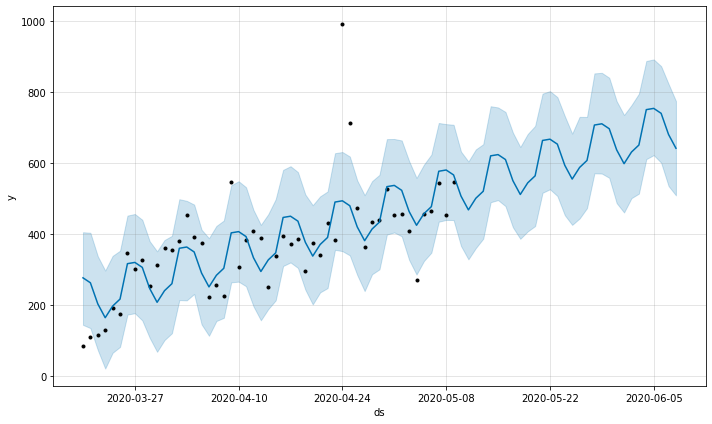

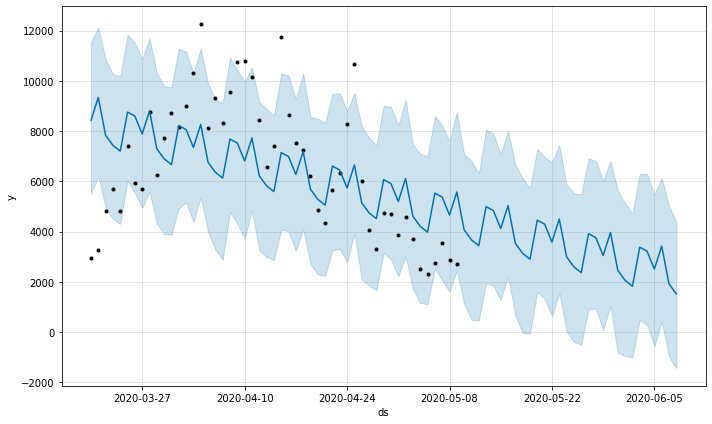

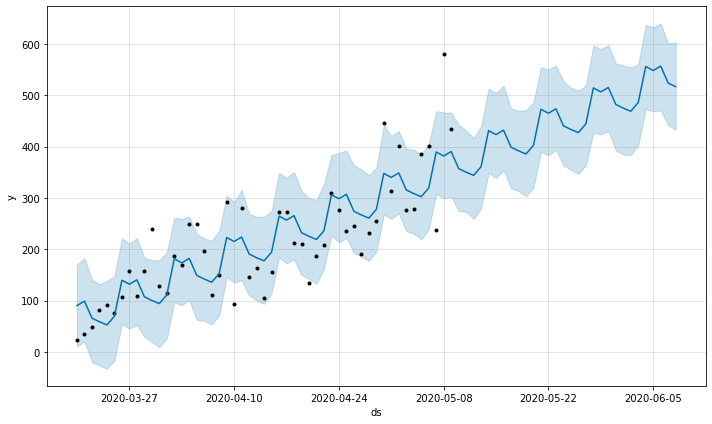

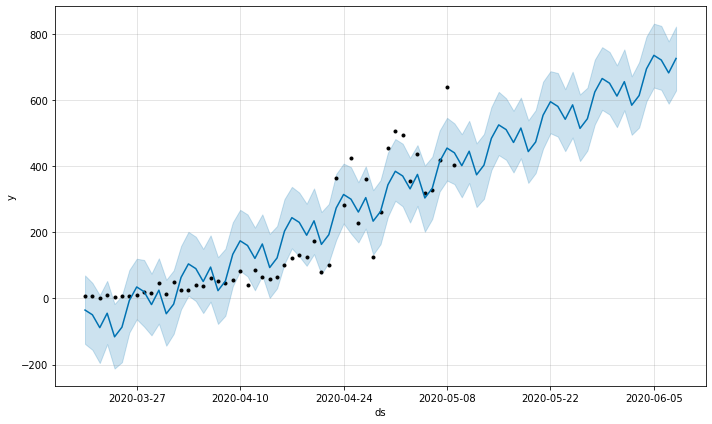

In [102]:
ydata = computeY(nyt, states,0,30,30,'prophet')

In [104]:
result = fitModel('/content/drive/My Drive/datathon/population_data/train_test_data.csv',ydata)

[ 0.04271728  0.0860846   0.01527794 -0.01217474  0.07604694  0.27009995
  0.03536792  0.17684993  0.03212456  0.17818211  0.00286941  0.31970488]
[[241.3770915 0.49 0 0.6369093938 8]
 [356.5796796 0.46 0 0.7112116902 5]
 [326.632758 0.54 1 0.7911767426999999 7]
 [106.8007433 0.45 0 0.6644718448 2]
 [42.87189469 0.48 0 0.7118452383 0]
 [653.0083373 0.33 0 0.72155558 4]
 [107.9599412 0.64 1 0.5764285624000001 3]
 [218.80410609999998 0.51 0 0.6853004 1]
 [64.86958522 0.49 0 0.6925767496999999 2]
 [55.32299002 0.47 0 0.6335925106 1]
 [63.85399596 0.53 1 0.6931141848000001 3]
 [25.00915344 0.54 1 0.6620516458 0]]
MSE: 0.03773716630079395

R2: -1.3939589044423117

-1.3939589044423117
[0.03536792 0.31970488 0.07604694] [0.3170544  0.14360633 0.02262854]
-0.1653740090500182
MSE: 0.018370370811519186

[0.03536792 0.31970488 0.07604694] [0.08797407 0.0913452  0.0900313 ]
0.06750392280949458
MSE: 0.014699400008277826

[0.03536792 0.31970488 0.07604694] [0.03531104 0.12298951 0.14954021]
-1.30203

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


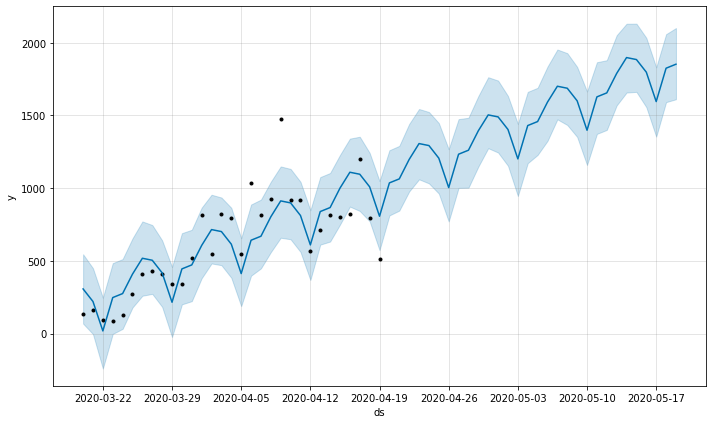

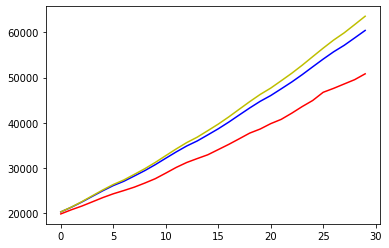

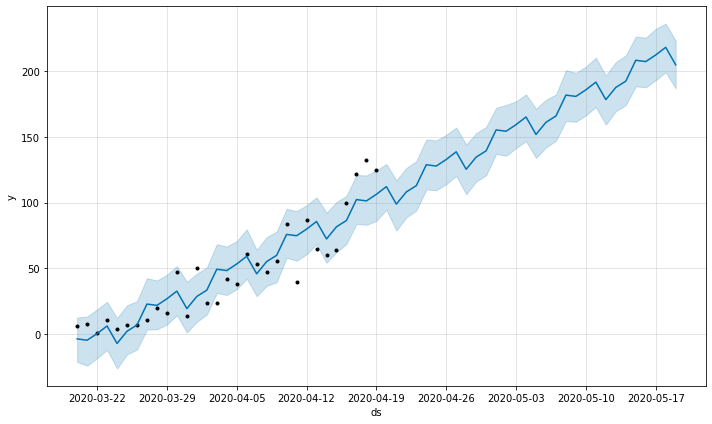

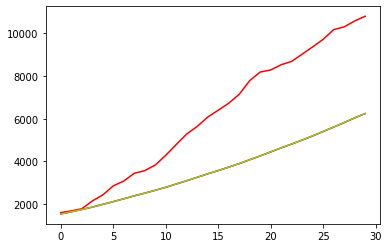

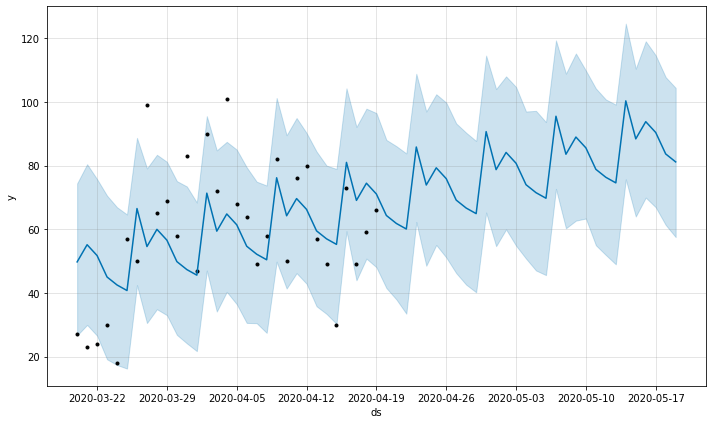

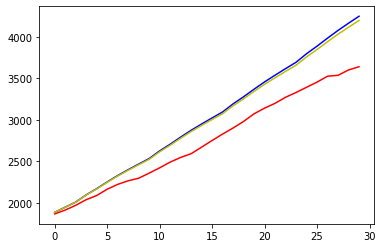

In [105]:
for key, value in result['result'].items():
  tspred = TSPrediction('covid-19-state-level-data.csv',key, '2020-03-20', '2020-04-20', 30).to_numpy()[31:]
  for i in range(0,30):
      pred[i] = tspred[i,0]/(1+value/15*i)

  gt = tspred[:,1]
  plt.figure()
  plt.plot(range(0,30),pred,'b')
  plt.plot(range(0,30),gt,'r')
  plt.plot(range(0,30),tspred[:,0],'y')

{'Arizona': -0.02948513969276223,
 'California': 0.14534922248352752,
 'Colorado': 0.21011219749051968,
 'Florida': 1.4082396804085602,
 'Illinois': 0.05487948144546575,
 'Massachusetts': 0.9813427780321626,
 'Minnesota': -0.6461381526904104,
 'Nebraska': -0.4609673618595009,
 'New York': 2.2766493709676445,
 'Oregon': 0.31053136893056144,
 'Texas': 0.3815034227572274,
 'Washington': 0.12703484342566837}

In [46]:
states = ['California', 'Washington','Oregon', 'Florida', 'Massachusetts', 'Texas', 'Illinois', 'Minnesota','Colorado', 'New York','Arizona','Nebraska']
states_abbv = ['CA', 'WA', 'OR','FL','MA','TX','IL','MN','CO','NY','AZ','NE']
len(states)

12

In [31]:
##Source:https://www.census.gov/geographies/reference-files/2010/geo/state-area.html
areas_state = {"California":163695,
               "Colorado":104093 , 'Texas':268580, 'New York':54556, 'Massachusetts':10555, 'Washington':71300, 'Oregon':98380, 'Minnesota':86938,'Illinois':57914,'Florida':65755,'Nebraska':77348, 'Arizona':113990}
len(areas_state)

12

In [32]:
def getTotalPopDensity(pop_df,states, areas):
  density = {}
  for state in states:
    density[state] = pop_df[pop_df['NAME'] == state].to_numpy()[0,1]/areas[state]
  return density

In [34]:
pop_by_age = pd.read_csv('/content/drive/My Drive/datathon/population_data/pop_age.csv')

In [35]:
pop_by_age_2019 = pop_by_age[['NAME','AGE','POPEST2019_CIV']]


In [39]:
def getTotalAgePercent(pop_density, ageData, areas):
  percent = {}
  for state in states:
    pop_ca = ageData[ageData['NAME']==state]
    pop_ca_50 = pop_ca[pop_ca["AGE"]>50]
    pop_ca_50 = pop_ca_50[pop_ca_50['AGE']<100]
    sum = pop_ca_50.sum().to_numpy()[2]
    percent[state] = sum/areas[state]/pop_density[state]
  return percent


In [43]:
train_test_data = pd.read_csv('/content/drive/My Drive/datathon/population_data/train_test_data.csv')

In [583]:
ydata

{'Arizona': 0.0044136655290192665,
 'California': 0.022925899642823815,
 'Colorado': 0.014447983281830282,
 'Florida': 0.347768521801976,
 'Illinois': -0.011378410951708042,
 'Massachusetts': 0.2447481953378603,
 'Minnesota': -0.43202054866600054,
 'Nebraska': -0.3868652250067952,
 'New York': 0.33369274806959004,
 'Oregon': 0.08468824773442078,
 'Texas': 0.16933490866490403,
 'Washington': 0.04871903098508829}

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


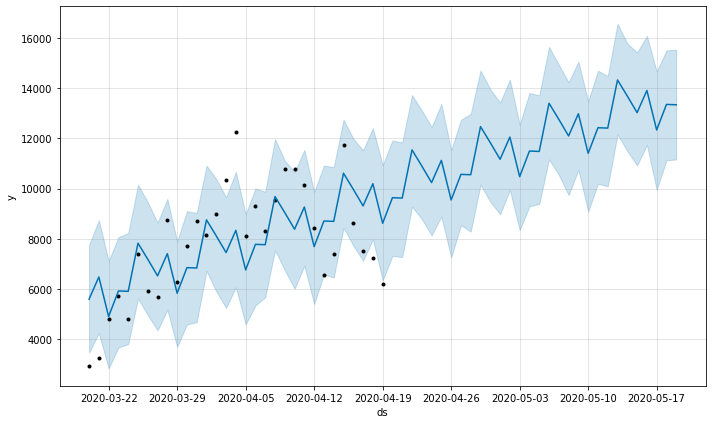

In [541]:
test = TSPrediction('covid-19-state-level-data.csv','New York', '2020-03-20', '2020-04-20', 30)